In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf

In [3]:
df=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [7]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [8]:
df.shape

(42, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [12]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [13]:
df_vis = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0, index_col=0, parse_dates=None,squeeze=True)

In [15]:
df_vis.head()

Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Quarter'>

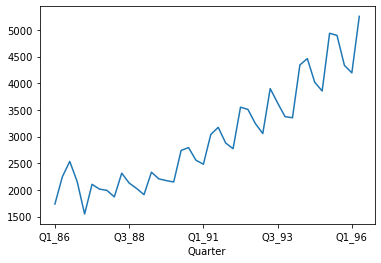

In [18]:
df_vis.plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

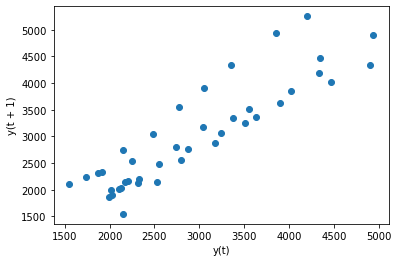

In [20]:
lag_plot(df_vis)

In [21]:
df['Quarters'] = 0
df['Year'] = 0
for i in range(42):
    p = df["Quarter"][i]
    df['Quarters'][i]=p[0:2]
    df['Year'][i]= p[3:5]
df.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [22]:
quater_dumies = pd.DataFrame(pd.get_dummies(df.Quarters))
quater_dumies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [24]:
df = pd.concat([df,quater_dumies],axis=1)
df.head()

,Quarter,Sales,Quarters,Year,t,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,1,0,0,0
1,Q2_86,2244.960999,Q2,86,2,0,1,0,0
2,Q3_86,2533.804993,Q3,86,3,0,0,1,0
3,Q4_86,2154.962997,Q4,86,4,0,0,0,1
4,Q1_87,1547.818996,Q1,87,5,1,0,0,0


In [25]:
df['t']=range(1,43)
df.head()

,Quarter,Sales,Quarters,Year,t,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,1,0,0,0
1,Q2_86,2244.960999,Q2,86,2,0,1,0,0
2,Q3_86,2533.804993,Q3,86,3,0,0,1,0
3,Q4_86,2154.962997,Q4,86,4,0,0,0,1
4,Q1_87,1547.818996,Q1,87,5,1,0,0,0


In [26]:
df['t_squared'] = df.t*df.t
df.head()

,Quarter,Sales,Quarters,Year,t,Q1,Q2,Q3,Q4,t_squared
0,Q1_86,1734.827000,Q1,86,1,1,0,0,0,1
1,Q2_86,2244.960999,Q2,86,2,0,1,0,0,4
2,Q3_86,2533.804993,Q3,86,3,0,0,1,0,9
3,Q4_86,2154.962997,Q4,86,4,0,0,0,1,16
4,Q1_87,1547.818996,Q1,87,5,1,0,0,0,25


In [27]:
df['log_Sales'] = np.log(df.Sales)
df.head()

,Quarter,Sales,Quarters,Year,t,Q1,Q2,Q3,Q4,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,86,1,1,0,0,0,1,7.458663
1,Q2_86,2244.960999,Q2,86,2,0,1,0,0,4,7.716443
2,Q3_86,2533.804993,Q3,86,3,0,0,1,0,9,7.837477
3,Q4_86,2154.962997,Q4,86,4,0,0,0,1,16,7.675529
4,Q1_87,1547.818996,Q1,87,5,1,0,0,0,25,7.344602


<AxesSubplot:xlabel='Quarters', ylabel='Year'>

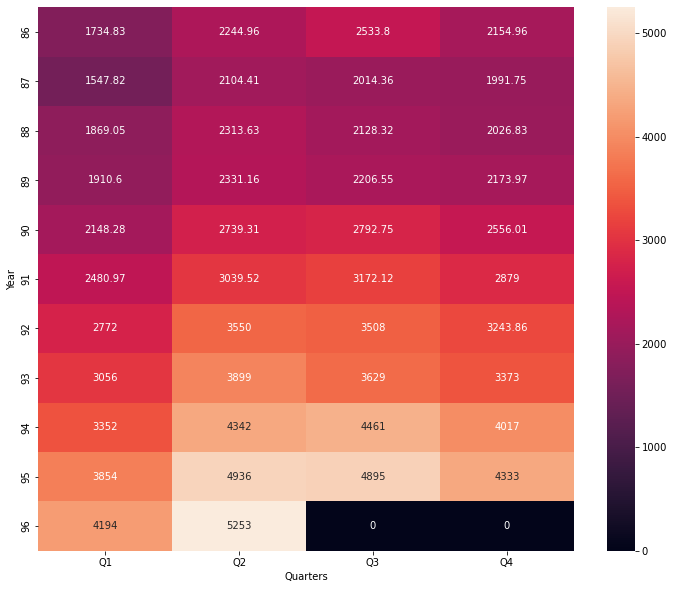

In [31]:
plt.figure(figsize=(12,10))
plot_month_y = pd.pivot_table(data = df, values="Sales", index = "Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(plot_month_y, annot=True, fmt = "g")

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

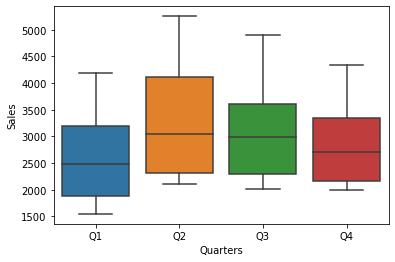

In [32]:
sns.boxplot(x='Quarters',y='Sales',data=df)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

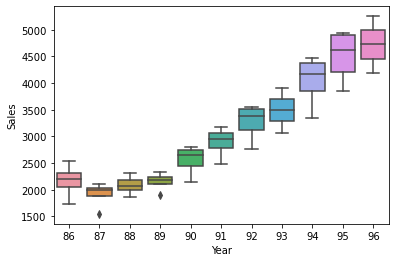

In [33]:
sns.boxplot(x="Year",y='Sales',data = df)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

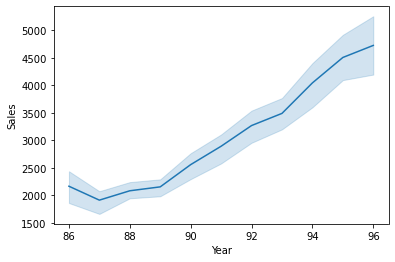

In [34]:
sns.lineplot(x='Year',y='Sales',data=df)

In [42]:
train = df.head(35)
test = df.tail(7)

In [43]:
linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
pred_linear

35    3840.422277
36    3904.126945
37    3967.831612
38    4031.536280
39    4095.240948
40    4158.945616
41    4222.650284
dtype: float64

 ## linear model

In [45]:
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

636.5072930351146

### Exponential model

In [46]:
exp_model = smf.ols('log_Sales~t',data=train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
pred_exp

35    8.280213
36    8.303351
37    8.326489
38    8.349626
39    8.372764
40    8.395901
41    8.419039
dtype: float64

In [47]:
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

493.348648484222

### Quadratic model

In [48]:
quad_model = smf.ols("Sales~t+t_squared",data=train).fit()
pred_quad = pd.Series(quad_model.predict(test[["t","t_squared"]]))
pred_quad

35    4337.773235
36    4484.369729
37    4635.446862
38    4791.004635
39    4951.043047
40    5115.562098
41    5284.561789
dtype: float64

In [49]:
rmse_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_quad

511.81173194173283

### Developing the model of Additive seasonality

In [50]:
add_sea_model = smf.ols('Sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_add_sea = pd.Series(add_sea_model.predict(test[['Q1','Q2','Q3','Q4']]))
pred_add_sea

35    2549.922247
36    2319.061332
37    2951.555664
38    2938.434220
39    2549.922247
40    2319.061332
41    2951.555664
dtype: float64

In [51]:
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1861.870416425175

### Developing the model of Additive seasonality quadratic

In [53]:
add_sea_Quad_model = smf.ols('Sales ~ t+t_squared+Q1+Q2+Q3+Q4',data = train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad_model.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']]))
pred_add_sea_quad

35    4197.333511
36    4120.453583
37    4840.142044
38    4914.214728
39    4795.942579
40    4736.501477
41    5473.628762
dtype: float64

In [54]:
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

309.4641395163693

### Developing the model of multiplicative seasonality

In [55]:
mul_sea_model = smf.ols('log_Sales ~ Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_sea = pd.Series(mul_sea_model.predict(test))
pred_mult_sea

35    7.823789
36    7.716661
37    7.958124
38    7.951932
39    7.823789
40    7.716661
41    7.958124
dtype: float64

In [56]:
rmse_mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

1938.9332351966193

### Developing the model of Multiplicative Additive Seasonality

In [57]:
mul_add_sea = smf.ols('log_Sales ~ t+Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test))
pred_mult_add_sea

35    8.231646
36    8.169836
37    8.411299
38    8.405107
39    8.322281
40    8.260471
41    8.501934
dtype: float64

In [58]:
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea

339.1874666994836

In [59]:
data1 = {"MODEL":pd.Series(['rmse_linear','rmse_Exp','rmse_Quad','rmse_add_sea','rmse_add_sea_quad','rmse_Mult_sea','rmse_Mult_add_sea']),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse = pd.DataFrame(data1)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,309.464140
6,rmse_Mult_add_sea,339.187467
1,rmse_Exp,493.348648
2,rmse_Quad,511.811732
0,rmse_linear,636.507293
3,rmse_add_sea,1861.870416
5,rmse_Mult_sea,1938.933235


# conclusion - Adictive seasonality quadratic model giving the best result